## LOGISTIC REGRESSION (BINARY CLASSIFICATION)
In classification, the predicted values are categorical unlike linear regression where the predicted values are continuous.

For this analysis, the employee retention dataset was downloaded from here: https://www.kaggle.com/giripujar/hr-analytics.

STEPS FOR THE ANALYSIS
1. Do an exploratory data analysis to find out which variables have direct and clear impact on            employee retention (i.e. whether they leave the company or continue to work).
2. Plot a chart showing impact of employee salaries on retention.
3. Plot a chart showing correlation between department and employee retention.
4. Now build logistic regression model using variables.
5. Measure the accuracy of the model.

In [60]:
#import all the libraries needed for the analysis/prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [61]:
#load the data
hr_data = pd.read_csv('HR_comma_sep.csv')
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Data Overview

In [62]:
#check the data info
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [63]:
#check the data shape
hr_data.shape

(14999, 10)

In [64]:
#check the data columns
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [65]:
#check for null 
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [66]:
#check for duplicates
hr_data.duplicated().sum()

3008

## Data Cleaning and Exploration

In [67]:
#rename the cloumn average_montly_hours to average_monthly_hours
hr_data.rename(columns = {'average_montly_hours': 'average_monthly_hours'}, inplace = True)

In [68]:
#view the duplicated rows
hr_data[hr_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [69]:
#drop duplicates
hr_data.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [107]:
#filter out data for employees that left. Note here 1 means Yes and 0 means No
hr_data_left = hr_data[hr_data['left'] == 1]
hr_data_left

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [108]:
#show filtered data for employees that are retained. Note here 1 means Yes and 0 means No
hr_data_retained = hr_data[hr_data['left'] == 0]
hr_data_retained

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [73]:
#Average numbers for all columns. Note here 1 means Yes and 0 means No
hr_data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Insight from the above table:
Employees leaving the firm were overall not happy that is why the left. They had low satisfaction level at 0.44, high time spent in the company at 3.87, high average monthly hours at 207, and lower promotion in the last five years at 0.005

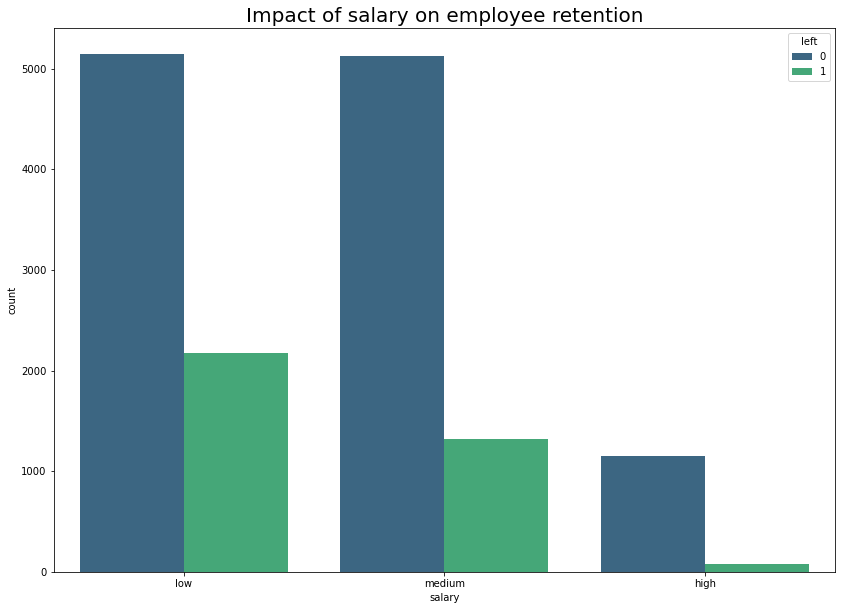

In [74]:
#Impact of salary on employee retention
figure = plt.figure(figsize = (14, 10))
plt.xticks(rotation = 360)
title = plt.title('Impact of salary on employee retention', color = 'black', fontsize = 20)
sns.countplot(x = hr_data['salary'], hue = hr_data['left'], palette = 'viridis')
plt.show()

The graph above shows that employees with high salaries are likely not to leave the company.

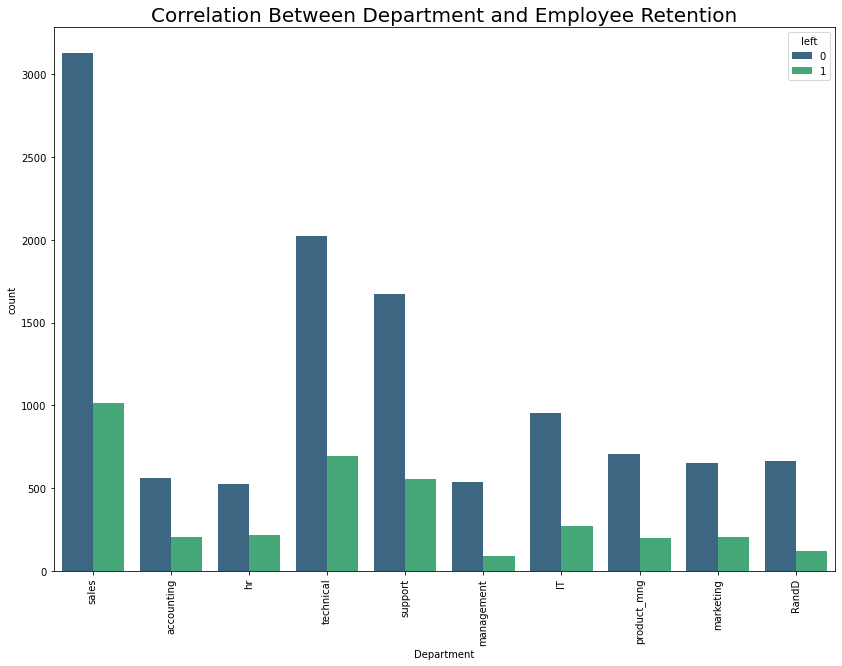

In [75]:
#Department wise employee retention rate
figure = plt.figure(figsize = (14, 10))
plt.xticks(rotation = 90)
title = plt.title('Correlation Between Department and Employee Retention', color = 'black', fontsize = 20)
sns.countplot(x = hr_data['Department'], hue = hr_data['left'], palette = 'viridis')
plt.show()

The graph above shows that employee retention based on department varies and therefore cannot be used as a determinant of why an employee left or stayed.

## Build logistic regression model using variables.

In [84]:
#Select columns of interest
hr_data_log = hr_data[['satisfaction_level', 'average_monthly_hours', 'promotion_last_5years', 'salary']]
hr_data_log.head(4)

,satisfaction_level,average_monthly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low


In [91]:
#Convert the string data in salary column to numeric values because machine learning use only numbers
salary_dummies = pd.get_dummies(hr_data_log['salary'])
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [94]:
#Merge the sub_original data with the dummy variables
hr_data_merged = pd.concat([hr_data_log, salary_dummies], axis = 'columns')
hr_data_merged.head(4)

,satisfaction_level,average_monthly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0


In [96]:
#Drop the the salary column since it has been replaced with dummy variables
hr_data_drop_salary = hr_data_merged.drop(['salary'], axis = 'columns')
hr_data_drop_salary.head(4)

,satisfaction_level,average_monthly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0


In [98]:
#get dataset for the X-axis which are mainly the independent variables.
x = hr_data_drop_salary
x.head(2)

,satisfaction_level,average_monthly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1


In [99]:
#get dataset for the y-axis which is mainly the dependent variable.
y = hr_data['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [100]:
#train_split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5)

In [109]:
#create class object
model = LogisticRegression()
model

LogisticRegression()

In [110]:
#Train the dataset
model.fit(x_train, y_train)

LogisticRegression()

In [111]:
#Predict X_test
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
#Measure the accuracy of the model
model.score(x_test, y_test)

0.7734666666666666